# Exercise 2: Sinusoids and the DFT

Doing this exercise you will get a better understanding of the basic elements and operations that take place in the Discrete Fourier Transform (DFT). There are five parts: 1) Generate a sinusoid, 2) Generate a complex sinusoid, 3) Implement the DFT, 4) Implement the IDFT, and 5) Compute the magnitude spectrum of an input sequence.

### Relevant Concepts

A real sinusoid in discrete time domain can be expressed by:

\begin{equation}
x[n] = A\cos(2 \pi fnT + \varphi)
\end{equation}

where, $x$ is the array of real values of the sinusoid, $n$ is an integer value expressing the time index, $A$ is the amplitude value of the sinusoid, $f$ is the frequency value of the sinusoid in Hz, $T$ is the sampling period equal to $1/fs$, fs is the sampling frequency in Hz, and $\varphi$ is the initial phase of the sinusoid in radians.

A complex sinusoid in discrete time domain can be expressed by:

\begin{equation}
\bar{x}[n] = Ae^{j(\omega nT + \varphi)} = A\cos(\omega nT + \varphi)+ j A\sin(\omega nT + \varphi)
\end{equation}

where, $\bar{x}$ is the array of complex values of the sinusoid, $n$ is an integer value expressing the time index, $A$ is the amplitude value of the sinusoid, $e$ is the complex exponential number, $\omega$ is the frequency of the sinusoid in radians per second (equal to $2 \pi f$), $T$ is the sampling period equal $1/fs$, fs is the sampling frequency in Hz and $\varphi$ is the initial phase of the sinusoid in radians.

The $N$ point DFT of a sequence of real values $x$ (a sound) can be expressed by:

\begin{equation}
X[k] = \sum_{n=0}^{N-1} x[n]e^{-j2 \pi kn/N}  \hspace{1cm} k=0,...,N-1
\end{equation}

where $n$ is an integer value expressing the discrete time index, $k$ is an integer value expressing the discrete frequency index, and $N$ is the length of the DFT.

The IDFT of a spectrum $X$ of length $N$ can be expressed by:

\begin{equation}
x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k]e^{j2 \pi kn/N}  \hspace{1cm} n=0,...,N-1
\end{equation}

where, $n$ is an integer value expressing the discrete time index, $k$ is an integer value expressing the discrete frequency index, and $N$ is the length of the spectrum $X$.

The magnitude of a complex spectrum $X$ is obtained by taking its absolute value: $|X[k]| $


## Part 1 - Generate a sinusoid

The function `gen_sine()` should generate a real sinusoid (use `np.cos()`) given its amplitude `A`, frequency `f` (Hz), initial phase `phi` (radians), sampling rate `fs` (Hz) and duration `t` (seconds). 

All the input arguments to this function `(A, f, phi, fs and t)` are real numbers such that `A`, `t` and `fs` are positive, and `fs > 2*f` to avoid aliasing. The function should return a numpy array `x` of the generated sinusoid. 

Use the function `cos` of the numpy package to compute the sinusoidal values.

In [1]:
import numpy as np

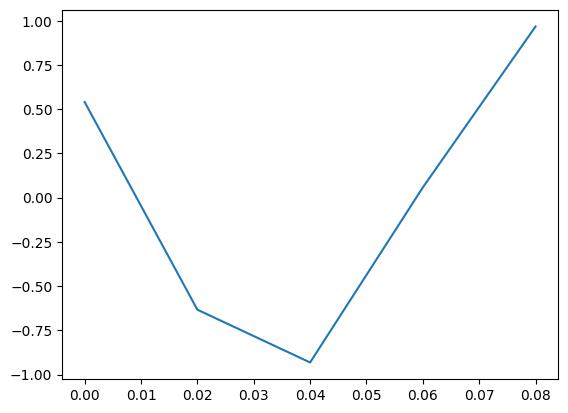

Sine wave sample values;
[ 0.54030231 -0.63332387 -0.93171798  0.05749049  0.96724906]


array([ 0.54030231, -0.63332387, -0.93171798,  0.05749049,  0.96724906])

In [1]:
# E2 - 1.1: Complete function gen_sine()

import numpy as np
import matplotlib.pylab as plt

def gen_sine(A, f, phi, fs, t):
    """Generate a real sinusoid given its amplitude, frequency, initial phase, sampling rate, and duration.
    
    Args:
        A (float):  amplitude of the sinusoid
        f (float): frequency of the sinusoid in Hz
        phi (float): initial phase of the sinusoid in radians
        fs (float): sampling frequency of the sinusoid in Hz
        t (float): duration of the sinusoid (is second)
        
    Returns:
        np.array: array containing generated sinusoid
        
    """
    ### your code here
    
    # limit input amplitude
    if (A > 1.0):
        A = 1.0
    if (A < 0.0):
        A = 0.0

    T = 1.0 / fs # waveform time period
    
    # OPTION 1 (as showed in the YouTube's video): creating a time_values array,
    # used to plot the output values (to space them apart in the x/time axis)
    """ comment/uncomment this line
    time_values = np.arange(0.0, t, T)
    
    y = A * np.cos(2 * np.pi * f * time_values + phi)
    
    plt.plot(time_values, y)
    plt.show()
    # """
    
    # OPTION 2: the time_values array is not created as a variable
    # maybe because I have a C/C++ background and I tend to manually write for loops (while python automatically
    # populates arrays in just 1 line of code), I find this solution
    # more mathematically similar to the formula given in the slides
    #""" comment/uncomment this line
    num_samples = int(fs * t)
    y = np.empty(num_samples)
    for n in range(0, num_samples):
        y[n] = A * np.cos(2 * np.pi * f * (n * T) + phi)
    
    plt.plot(np.arange(0.0, t, T), y)
    plt.show()
    # """
    
    print("Sine wave sample values;")
    print(y)
        
    return y
    
# args: (A,   f,  phi,fs, t): 
gen_sine(1.0, 10., 1, 50, 0.1)

If you use `A=1.0, f = 10.0, phi = 1.0, fs = 50` and `t = 0.1` as input to the function `gen_sine()` the output numpy array should be:

```
array([ 0.54030231, -0.63332387, -0.93171798,  0.05749049,  0.96724906])
```

To generate a sinewave that you can hear, it should be longer and with a higher sampling rate. For example you can use `A=1.0, f = 440.0, phi = 1.0, fs = 5000` and `t = 0.5`. To play it import the `Ipython.display` package and use `ipd.display(ipd.Audio(data=x, rate=fs))`.

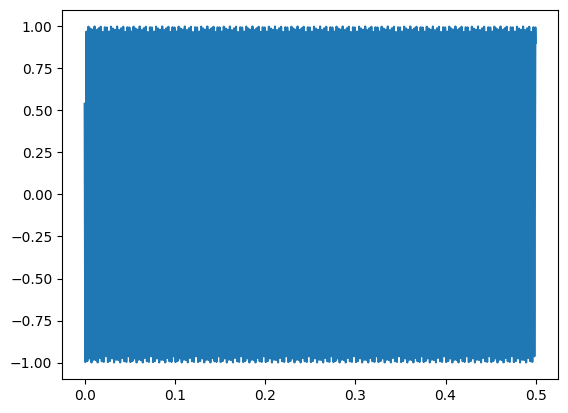

Sine wave sample values;
[ 0.54030231  0.01787507 -0.50987914 ...  0.79075133  0.99440411
  0.90171349]


In [2]:
# E2 - 1.2: Call the function gen_sine() with the values proposed above, plot and play the output sinusoid

import numpy as np
import matplotlib.pylab as plt
import IPython.display as ipd

def gen_sine(A, f, phi, fs, t):
    """Generate a real sinusoid given its amplitude, frequency, initial phase, sampling rate, and duration.
    
    Args:
        A (float):  amplitude of the sinusoid
        f (float): frequency of the sinusoid in Hz
        phi (float): initial phase of the sinusoid in radians
        fs (float): sampling frequency of the sinusoid in Hz
        t (float): duration of the sinusoid (is second)
        
    Returns:
        np.array: array containing generated sinusoid
        
    """
    ### your code here
    
    # limit input amplitude
    if (A > 1.0):
        A = 1.0
    if (A < 0.0):
        A = 0.0

    T = 1.0 / fs # waveform time period
    
    # OPTION 1 (as showed in the YouTube's video): creating a time_values array,
    # used to plot the output values (to space them apart in the x/time axis)
    """ comment/uncomment this line
    time_values = np.arange(0.0, t, T)
    
    y = A * np.cos(2 * np.pi * f * time_values + phi)
    
    plt.plot(time_values, y)
    plt.show()
    # """
    
    # OPTION 2: the time_values array is not created as a variable
    # maybe because I have a C/C++ background and I tend to manually write for loops (while python automatically
    # populates arrays in just 1 line of code), I find this solution
    # more mathematically similar to the formula given in the slides
    #""" comment/uncomment this line
    num_samples = int(fs * t)
    y = np.empty(num_samples)
    for n in range(0, num_samples):
        y[n] = A * np.cos(2 * np.pi * f * (n * T) + phi)
    
    plt.plot(np.arange(0.0, t, T), y)
    plt.show()
    # """
    
    print("Sine wave sample values;")
    print(y)
        
    return y

### your code here

fs = 5000
output_sinewave = gen_sine(1.0, 440.0, 1.0, fs, 0.5)
# **kwargs feature in Python is very interesting to me, coming form a C++ background
# Since functions' arguments are "named", they can be passed in any order and any number
# This is why, ipd.display(ipd.Audio(fs, output_sinewave)) would not work (I got stuck in there for a while :))
ipd.display(ipd.Audio(rate=fs, data=output_sinewave))

## Part 2 - Generate a complex sinusoid 

The `gen_complex_sine()` function should generate the complex sinusoid that is used in DFT computation of length `N` (samples), corresponding to the frequency index `k`. [Note that in the DFT we use the conjugate of this complex sinusoid.]

The amplitude of such a complex sinusoid is `1`, the length is `N`, and the frequency in radians is `2*pi*k/N`.

The input arguments to the function are two positive integers, `k` and `N`, such that `k < N-1`. The function should return `c_sine`, a numpy array of the complex sinusoid. Use the function `exp()` of the numpy package to compute the complex sinusoidal values.

In [4]:
# E2 - 2.1: Complete function the function gen_complex_sine()

def gen_complex_sine(k, N):
    """Generate one of the complex sinusoids used in the DFT from its frequency index and the DFT lenght.
    
    Args:
        k (integer): frequency index of the complex sinusoid of the DFT
        N (integer) = length of complex sinusoid, DFT length, in samples
        
    Returns:
        np.array: array with generated complex sinusoid (length N)
        
    """
    ### your code here
    
    n = np.arange(0, N)
    
    # print(n)
    
    # j (square root of -1) is a literal in numpy
    c_sine = np.exp(1j * 2 * np.pi * k * n / N)
    
    #print(c_sine)

    return c_sine


If you run the function `gen_complex_sine()` using `k=1` and `N=5`, it should return the following numpy array:

```
array([ 1. + 0.j,  0.30901699 + 0.95105652j, -0.80901699 + 0.58778525j, -0.80901699 - 0.58778525j, 0.30901699 - 0.95105652j])
```

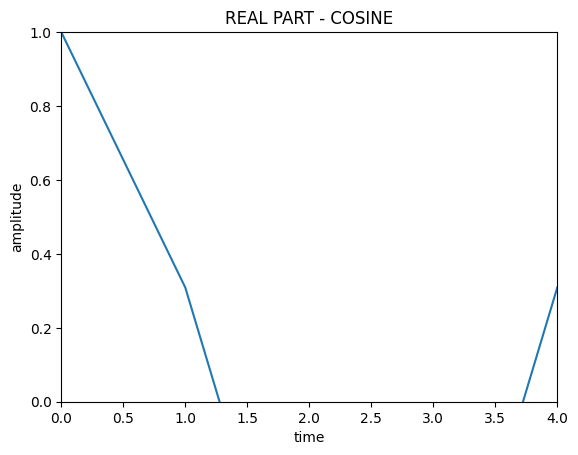

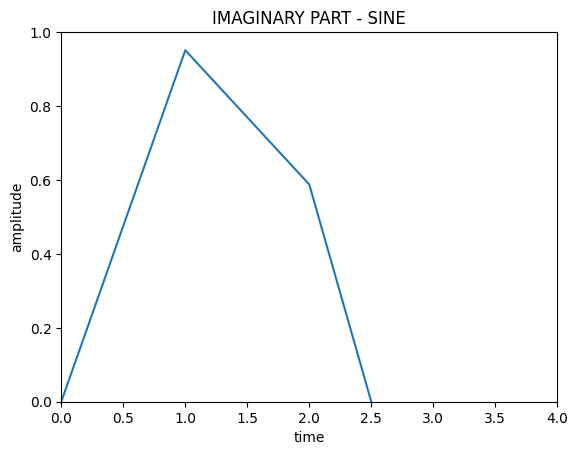

In [6]:
# E2 - 2.2: Call gen_complex_sine() with the values suggested above and plot the real and imaginary parts of the 
# output complex sinusoid

### your code here

N=5
complex_sinewave = gen_complex_sine(1, N)

plt.plot(np.arange(0, N), np.real(complex_sinewave))
plt.axis([0, N-1, 0.0, 1.0])
plt.title("REAL PART - COSINE")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.show()

plt.plot(np.arange(0, N), np.imag(complex_sinewave))
plt.axis([0, N-1, 0.0, 1.0])
plt.title("IMAGINARY PART - SINE")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.show()

## Part 3 - Implement the discrete Fourier transform (DFT)

The function `dft()` should implement the discrete Fourier transform (DFT) equation given above. Given a sequence `x` of length `N`, the function should return its spectrum of length `N` with the frequency indexes ranging from 0 to `N-1`.

The input argument to the function is a numpy array `x` and the function should return a numpy array `X`, the DFT of `x`.

In [7]:
# E2 - 3.1: Complete the function dft()
import numpy as np

def dft(x):
    """Compute the DFT of a signal.
    
    Args:
        x (numpy array): input sequence of length N
        
    Returns:
        np.array: N point DFT of the input sequence x
    """
    ## Your code here
    
    # The DFT calculates the similarity between sinewaves of frequency k (0,1, 2,..., N-1 where N is the number of samples in the
    # input signal; note that this frequencies, apart from the first which is 0 -DC- are all integer multiples
    # of the input signal's period) and the input signal. In other words, it calculates the contribution
    # of each periodic sinewave to the input signal's waveform.
    # Each output X[k] is the result of a scalar product between the input signal and a (conjugated) complex exponential of frequency k.
    # The number of frequency domain outputs (bins) (N-1) is the same as the number of input time domain samples.
    
    N = x.size   
    print("Size of input array;")
    print(N)
    
    X = np.array([])
    
    for k in range(N):
        c_sinewave = np.exp(1j * 2 * np.pi * k * np.arange(N) / N)
        # append element to an array ; np.sum sums contiguous elements of 2 or more arrays
        X = np.append(X, np.sum(x * np.conjugate(c_sinewave)))
        
    print("DFT complex sinewaves values;")
    print(X)  
    
    return X

#dft(np.array([1, 2, 3, 4]))

If you run `dft()` using as input `x = np.array([1, 2, 3, 4])`, the function shoulds return the following numpy array:

```
array([10.0 + 0.0j,  -2. +2.0j,  -2.0 - 9.79717439e-16j, -2.0 - 2.0j])
```

Note that you might not get an exact 0 in the output because of the small numerical errors due to the limited precision of the data in your computer. Usually these errors are of the order 1e-15 depending on your machine.

Size of input array;
4
DFT complex sinewaves values;
[10.+0.00000000e+00j -2.+2.00000000e+00j -2.-9.79717439e-16j
 -2.-2.00000000e+00j]


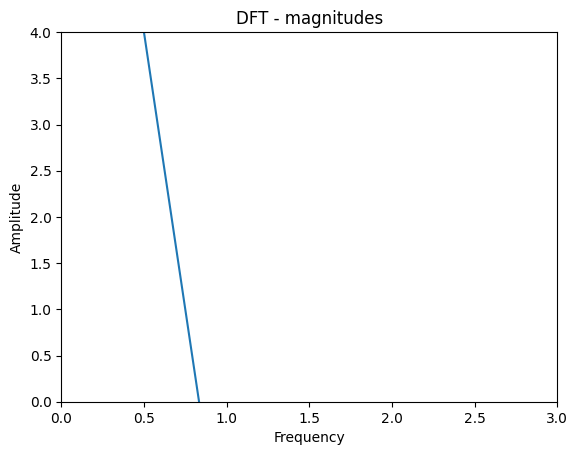

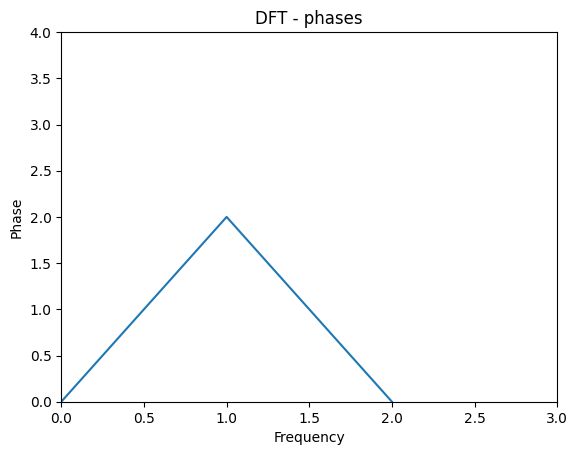

In [9]:
# E2 - 3.2: Call dft() with the values suggested above and plot the real and imaginary parts of output spectrum

### your code here

x = np.array([1, 2, 3, 4])
N = x.size
X = dft(x)


plt.plot(np.arange(0, N), np.real(X))
plt.axis([0, N-1, 0, N])
plt.title("DFT - magnitudes")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()

plt.plot(np.arange(0, N), np.imag(X))
plt.axis([0, N-1, 0, N])
plt.title("DFT - phases")
plt.xlabel("Frequency")
plt.ylabel("Phase")
plt.show()

## Part 4 - Implement the inverse discrete Fourier transform (IDFT)

The function `idft()` should implement the inverse discrete Fourier transform (IDFT) equation given above. Given a frequency spectrum `X` of length `N`, the function should return its IDFT `x`, also of length `N`. Assume that the frequency index of the input spectrum ranges from 0 to `N-1`.

The input argument to the function is a numpy array `X` of the frequency spectrum and the function should return a numpy array of the IDFT of `X`.

Remember to scale the output appropriately.

In [8]:
# E2 - 4.1: Complete the function idft()

def idft(X):
    """Compute the inverse-DFT of a spectrum.
    
    Args:
        X (np.array): frequency spectrum (length N)
        
    Returns:
        np.array: N point IDFT of the frequency spectrum X
        
    """
    ### Your code here
    # The IDFT reconstructs sinewaves of frequency k (0,...,N-1 where N is the number of frequency bins in X)
    # with their respective amplitude and phase, specified in the magnitude/phase spectrum of the DFT.
    # Then, it sums all these sinewaves together. It is additive synthesis.
    # Mathematically, it is similar to the DFT, but the complex exponentials (the sinewaves) 
    # are not conjugated (since there is no scalar product but a classic multiplication), and also each sinewave's
    # amplitude is normalized with respect to N (number of frequency bins in X)
    
    N = X.size   
    print("Size of input array;")
    print(N)
    
    x = np.array([])
    
    for k in range(N):
        c_sinewave = np.exp(1j * 2 * np.pi * k * np.arange(N) / N)
        # append element to an array ; sum contiguous elements of 2 or more arrays
        x = np.append(x, (np.sum(X * c_sinewave) * 1/N))
        
    print("IDFT real sinewaves values;")
    print(x)  
    
    return x


idft(np.array([1, 1, 1, 1]))

Size of input array;
4
IDFT real sinewaves values;
[ 1.00000000e+00+0.00000000e+00j -5.55111512e-17+2.77555756e-17j
  0.00000000e+00+6.12323400e-17j  8.32667268e-17+1.11022302e-16j]


array([ 1.00000000e+00+0.00000000e+00j, -5.55111512e-17+2.77555756e-17j,
        0.00000000e+00+6.12323400e-17j,  8.32667268e-17+1.11022302e-16j])

If you run `idft()` with the input `X = np.array([1, 1, 1, 1])`, the function should return the following numpy array: 

```
array([  1.00000000e+00 +0.00000000e+00j,   -4.59242550e-17 +5.55111512e-17j,   0.00000000e+00 +6.12323400e-17j,   8.22616137e-17 +8.32667268e-17j])
```

Notice that the output numpy array is essentially `[1, 0, 0, 0]`. Instead of exact 0 we get very small numerical values of the order of 1e-15, which can be ignored. Also, these small numerical errors are machine dependent and might be different in your case.

In addition, an interesting test of the IDFT function can be done by providing the output of the DFT of a sequence as the input to the IDFT. See if you get back the original time domain sequence.

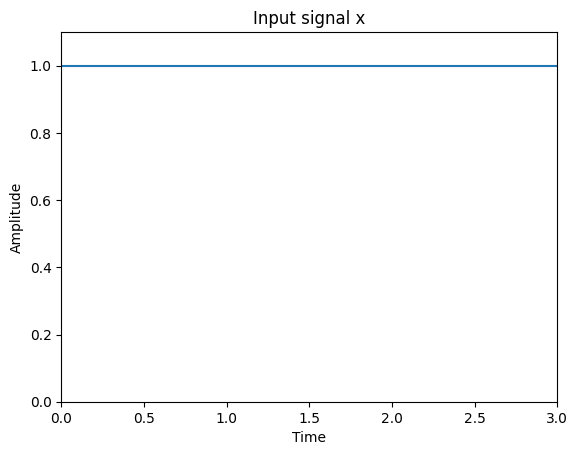

Size of input array;
4
DFT complex sinewaves values;
[ 4.00000000e+00+0.00000000e+00j -2.22044605e-16-1.11022302e-16j
  0.00000000e+00-2.44929360e-16j  3.33066907e-16-4.44089210e-16j]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


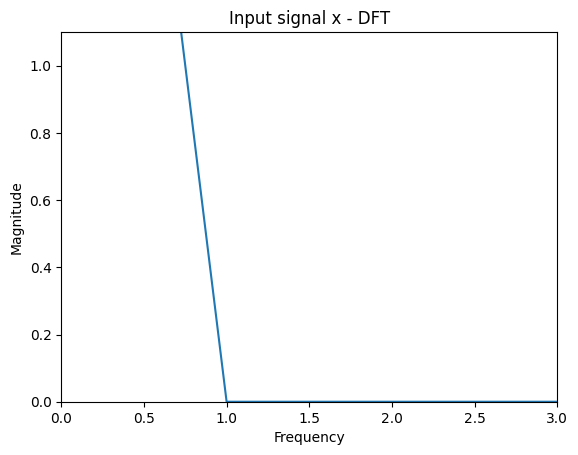

Size of input array;
4
IDFT real sinewaves values;
[1.-2.00010218e-16j 1.-7.75455381e-17j 1.+7.75455381e-17j
 1.+2.00010218e-16j]


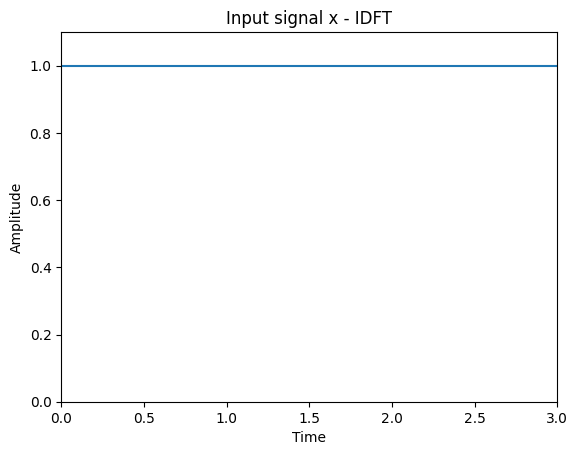

In [9]:
# E2 - 4.2: Plot input spectrum (real and imaginary parts) suggested above, call idft(), and plot output signal 
# (real and imaginary parts)

### Your code here

x = np.array([1, 1, 1, 1])

plt.plot(np.arange(0, x.size), x)
plt.axis([0, x.size-1, 0.0, 1.1])
plt.title("Input signal x")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

X = dft(x)

plt.plot(np.arange(0, X.size), X)
plt.axis([0, X.size-1, 0.0, 1.1])
plt.title("Input signal x - DFT")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

supposed_input_signal_x = np.real(idft(X))

plt.plot(np.arange(0, supposed_input_signal_x.size), supposed_input_signal_x)
plt.axis([0, supposed_input_signal_x.size-1, 0.0, 1.1])
plt.title("Input signal x - IDFT")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

## Part 5 - Compute the magnitude spectrum

The function `gen_mag_spectrum()` should compute the magnitude spectrum of an input sequence `x` of length `N`. The function should return an `N` point magnitude spectrum with frequency index ranging from 0 to `N-1`.

The input argument to the function is a numpy array `x` and the function should return a numpy array of the magnitude spectrum of `x`.

In [10]:
# E2 - 5.1: Complete the function gen_mag_spec()

def gen_mag_spec(x):
    """Compute magnitude spectrum of a signal.
    
    Args:
        x (np.array): input sequence of length N
        
    Returns:
        np.array: magnitude spectrum of the input sequence x (length N)
        
    """
    ### your code here
    
    # Magnitude and phase are concepts relative to the Polar Form representation of complex numbers
    # The Magnitude, however, can be calculated using Pythagora's theorem and the cosine and sine values relative to the analogous rectangular form representation
    # The magnitude spectrum is the series of absolute values (vectors' magnitudes, that is, the
    # Euclidean distance from the 0, 0 origin to the x(cos), y(sine) point in the rectangular form)
    # of the complex sinusoids generated by the DFT
    # NOTE; the magnitude is NOT the cosine (real part of the complex mumber)
    # e.g.: Z = a + j*b ; |Z| = square root of (a^2 + b^2) (Pythagora's theorem)
    
    X_mag = np.abs(dft(x)) 
    return X_mag

If you run `gen_mag_spec()` using as input `x = np.array([1, 2, 3, 4])`, it should return the following numpy array:
```
array([10.0, 2.82842712, 2.0, 2.82842712])
```
For a more realistic use of `gen_mag_spec()` use as input a longer signal, such as `x = np.cos(2*np.pi*200.0*np.arange(512)/1000)`, and to get a visual representation of the input and output, import the `matplotlib.pyplot` package and use `plt.plot(x)` and `plt.plot(X)`.

In [11]:
import IPython.display as ipd
import matplotlib.pyplot as plt

X_mag = gen_mag_spec(np.array([1, 2, 3, 4]))
print("Magnitude values out of the DFT;")
print(X_mag)

Size of input array;
4
DFT complex sinewaves values;
[10.+0.00000000e+00j -2.+2.00000000e+00j -2.-9.79717439e-16j
 -2.-2.00000000e+00j]
Magnitude values out of the DFT;
[10.          2.82842712  2.          2.82842712]


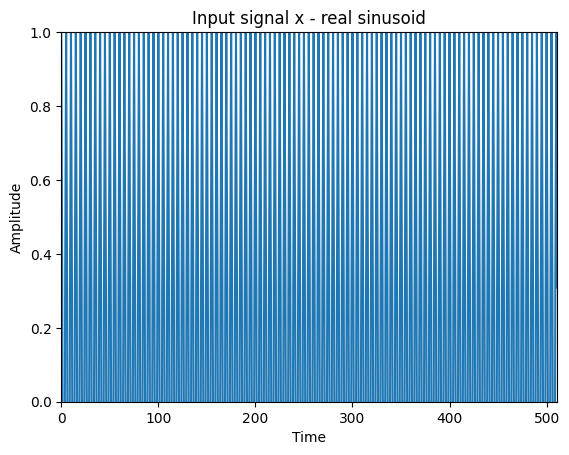

Size of input array;
512
DFT complex sinewaves values;
[ 1.30901699e+00+0.00000000e+00j  1.30906108e+00+1.60654029e-02j
  1.30919339e+00+3.21388937e-02j  1.30941407e+00+4.82285759e-02j
  1.30972338e+00+6.43425836e-02j  1.31012168e+00+8.04890974e-02j
  1.31060943e+00+9.66763598e-02j  1.31118721e+00+1.12912691e-01j
  1.31185569e+00+1.29206508e-01j  1.31261565e+00+1.45566334e-01j
  1.31346799e+00+1.62000826e-01j  1.31441374e+00+1.78518782e-01j
  1.31545400e+00+1.95129169e-01j  1.31659005e+00+2.11841133e-01j
  1.31782324e+00+2.28664024e-01j  1.31915509e+00+2.45607418e-01j
  1.32058723e+00+2.62681132e-01j  1.32212144e+00+2.79895255e-01j
  1.32375963e+00+2.97260165e-01j  1.32550388e+00+3.14786557e-01j
  1.32735641e+00+3.32485471e-01j  1.32931961e+00+3.50368317e-01j
  1.33139605e+00+3.68446908e-01j  1.33358847e+00+3.86733490e-01j
  1.33589980e+00+4.05240775e-01j  1.33833319e+00+4.23981983e-01j
  1.34089197e+00+4.42970873e-01j  1.34357972e+00+4.62221792e-01j
  1.34640025e+00+4.81749713e-01j  1

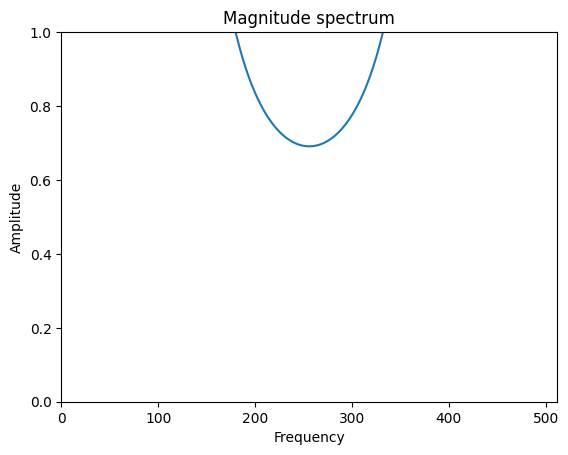

In [27]:
# E2 - 5.2: Plot input cosine signal suggested above, call gen_mag_spec(), and plot the output result

### Your code here

x = np.cos(2*np.pi*200.0*np.arange(512)/1000)

plt.plot(np.arange(x.size), x)
plt.axis([0, x.size-1, 0.0, 1.0])
plt.title("Input signal x - real sinusoid")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

X_mag = gen_mag_spec(x)
plt.plot(np.arange(X_mag.size), X_mag)
plt.axis([0, X_mag.size, 0.0, 1.0])
plt.title("Magnitude spectrum")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()